In [1]:
# Copyright (c) 2020, Pietro Vischia pietro.vischia@cern.ch

import random
from matplotlib import pyplot as plt


In [2]:
# Simulate the roll of a die

def die_roll():
    roll = random.randint(1,6) 
    return roll

# Check if a given roll is even or odd

def is_even(roll):
    if (roll % 2) == 0:
        return True
    else:
        return False


[1, 5, 10, 20, 30, 40, 50, 60, 80, 90, 100, 130, 160, 180, 200, 400, 500, 750, 1000, 2000, 3000, 5000, 10000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


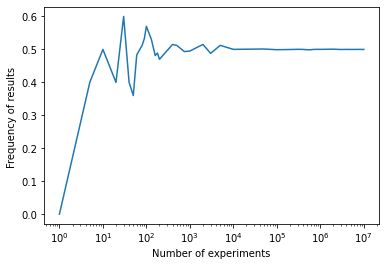

In [13]:
# Define number of experiments

N = [1, 5, 10, 20, 30, 40, 50, 60, 80, 90, 100, 130, 160, 180, 200, 400, 500, 750, 1000, 2000, 3000, 5000, 10000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]

freqs = [ 0 for n in N ]

print(N)
print(freqs)

for n in range(len(N)):
    # For each set of experiments, throw the die n times
    n_even=0
    for n_i in range(N[n]):
        if is_even(die_roll()):
            n_even +=1
    freqs[n] = n_even/N[n]

# Plot the results
plt.plot(N,freqs)
plt.xlabel('Number of experiments')
plt.xscale('log')
plt.ylabel('Frequency of results ')

plt.show()


The frequency seems to stabilize after about $10^4$ iterations, but is that really so?


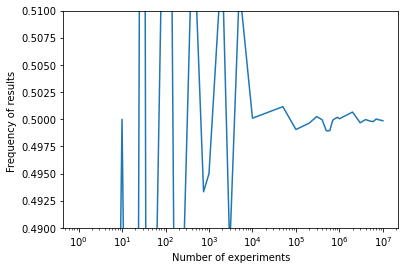

In [15]:
plt.plot(N,freqs)
plt.xlabel('Number of experiments')
plt.xscale('log')
plt.ylabel('Frequency of results ')
plt.ylim(0.49,0.51)
plt.show()


In [28]:
print('Frequency')
import pandas as pd
import numpy as np
#y= pd.DataFrame(N, freqs)
#y.columns=['Number of tosses', 'Empirical frequency']
y = pd.DataFrame({'Number of tosses': N, 'Empirical frequency': freqs, 'Deviation from expected 0.5': [ i/0.5 for i in (freqs- np.repeat([0.5], len(freqs)))]})
print(y)
#for iN, ifreq in zip(N, freqs):
#    print('R')

Frequency
    Number of tosses  Empirical frequency  Deviation from expected 0.5
0                  1             0.000000                    -1.000000
1                  5             0.400000                    -0.200000
2                 10             0.500000                     0.000000
3                 20             0.400000                    -0.200000
4                 30             0.600000                     0.200000
5                 40             0.400000                    -0.200000
6                 50             0.360000                    -0.280000
7                 60             0.483333                    -0.033333
8                 80             0.512500                     0.025000
9                 90             0.533333                     0.066667
10               100             0.570000                     0.140000
11               130             0.530769                     0.061538
12               160             0.481250                    -0.037

(-0.01, 0.01)

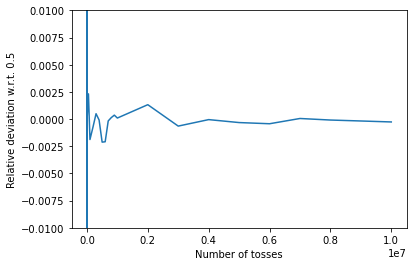

In [30]:
plt.plot(y['Number of tosses'], y['Deviation from expected 0.5'])
plt.ylabel('Relative deviation w.r.t. 0.5')
plt.xlabel('Number of tosses')
plt.ylim(-0.01,0.01)